#French Paintings Dataset - Human Detection YoloV5 
This notebook detects humans in French paintings using the YoloV5 model and the annotated dataset. 

## Dataset:
I used the method of webscraping to get the images for the dataset from the website [Web Gallery of Art](https://www.wga.hu/) images were filtered by French Paintings only. 

The dataset was split into 80 percent train and 20 percent validation. 

##Annotations: 
The images were annotated using the website [Roboflow](https://roboflow.com/). 

For each human in the French paintings I drew a bounding box around them and generated a .txt file with the bounding boxes coordinates (class, center coordinates, width, height) 

There were 1,500 plus images annotated but this is not enough to train a complex model like YOLOv5 so more data was needed and therfore augmentations were added to the images with the augmentation steps I was able to generate around 3 times more data than we had before. These augmentations inlcuded, rotation, horizontal flip, saturation, hue, brightness, and cutout. With these augmentations synthetic data was generated and I was able to use YOLOv5 to train.   


##Install Requirements 

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 10628, done.
remote: Total 10628 (delta 0), reused 0 (delta 0), pack-reused 10628
Receiving objects: 100% (10628/10628), 10.84 MiB | 33.84 MiB/s, done.
Resolving deltas: 100% (7335/7335), done.
/content/yolov5
     |████████████████████████████████| 596 kB 20.0 MB/s 
     |████████████████████████████████| 145 kB 38.5 MB/s 
     |████████████████████████████████| 178 kB 61.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 67 kB 7.9 MB/s 
     |████████████████████████████████| 138 kB 78.6 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have foliu

##Import Dataset 


In [3]:


from roboflow import Roboflow
rf = Roboflow(api_key="U3pEb4nHkn3FFwhtQYi0")
project = rf.workspace().project("french-paintings-dataset-d2vbe")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to French-Paintings-Dataset--1 in yolov5pytorch:: 100%|██████████| 7810/7810 [00:11<00:00, 681.17it/s] 


In [4]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

##Training the model 

In [5]:
!python train.py --img 640 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/French-Paintings-Dataset--1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-207-g8efe977 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

## Inference

In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/French-Paintings-Dataset--1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-207-g8efe977 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/yolov5/French-Paintings-Dataset--1/test/images/01soap_b_jpg.rf.8d09a626e9b0e455f4cfe9959af644f0.jpg: 640x640 2 Humans, Done. (0.015s)
image 2/15 /content/yolov5/French-Paintings-Dataset--1/test/images/10healin_jpg.rf.95ee860ba3184263f7221b74d2e0ae2f.jpg: 640x640 14 Humans, Done. (0.015s)
image 3/15 /content/yolov5/Fre

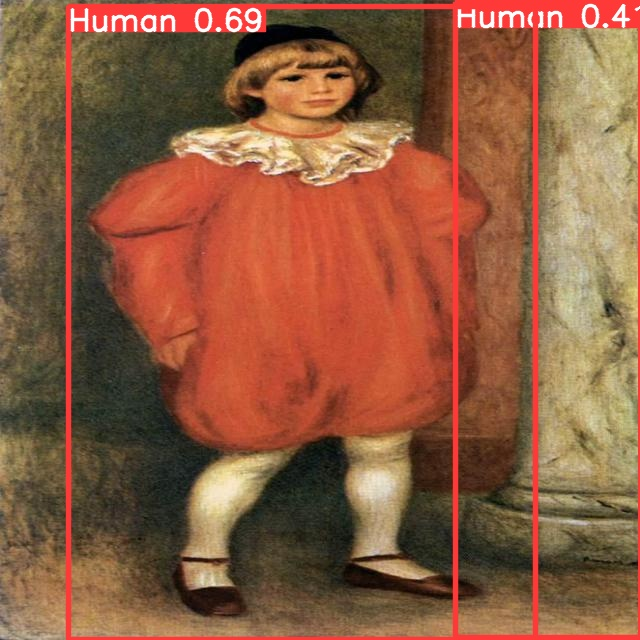

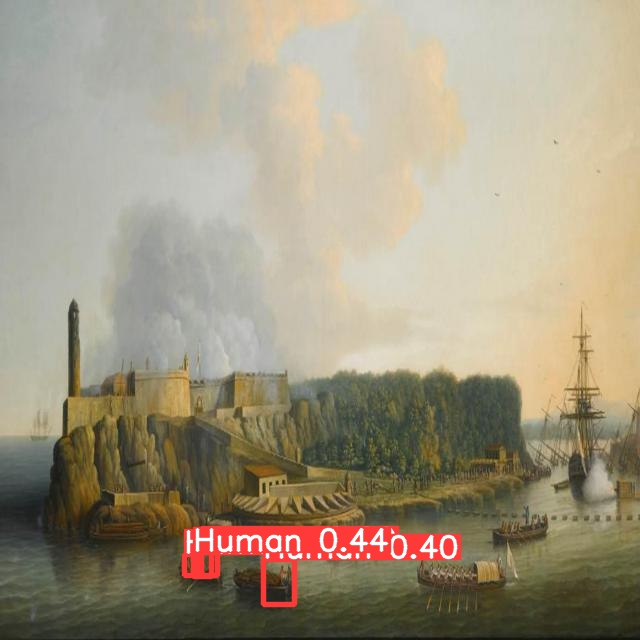

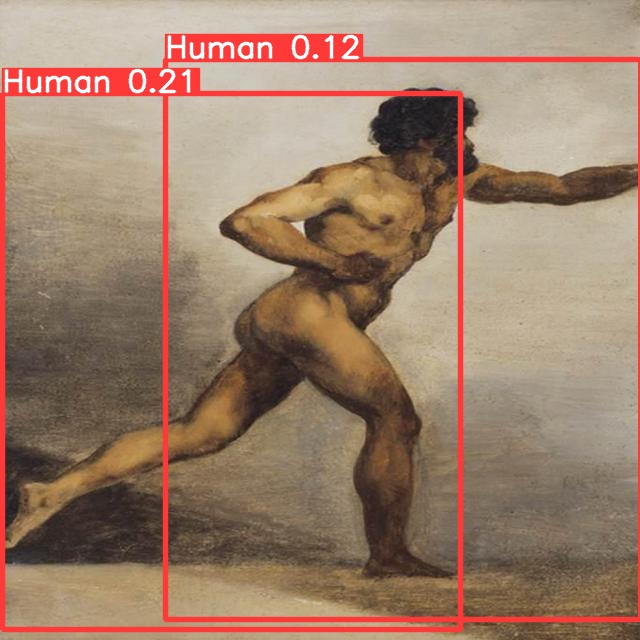

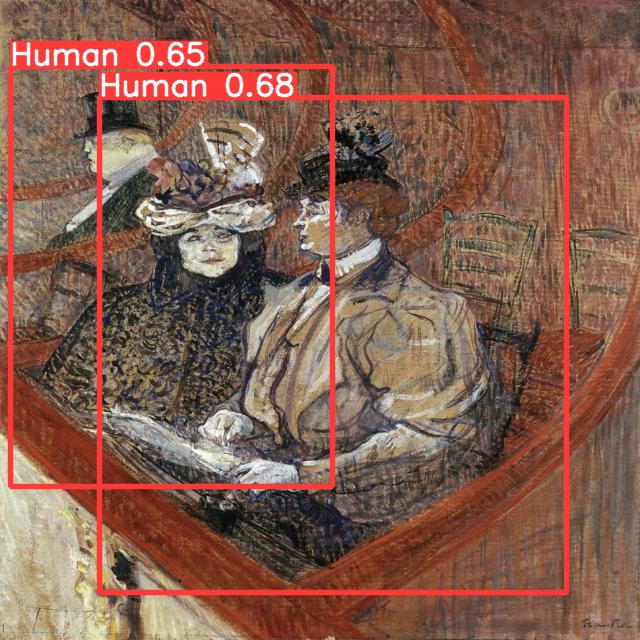

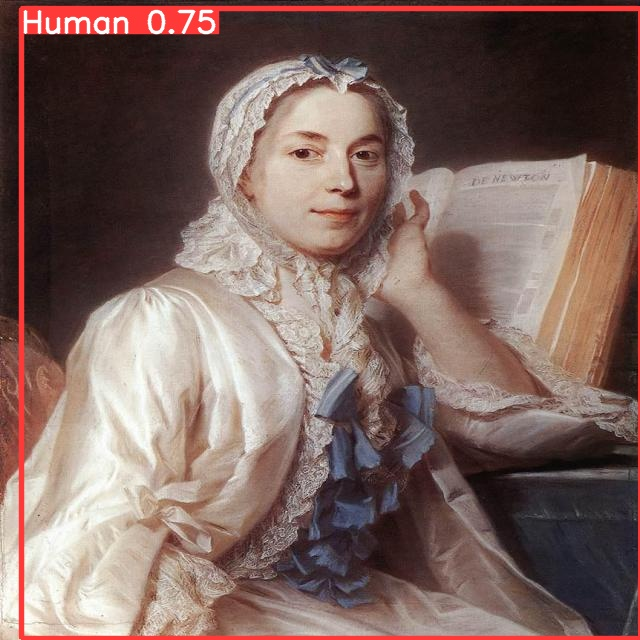

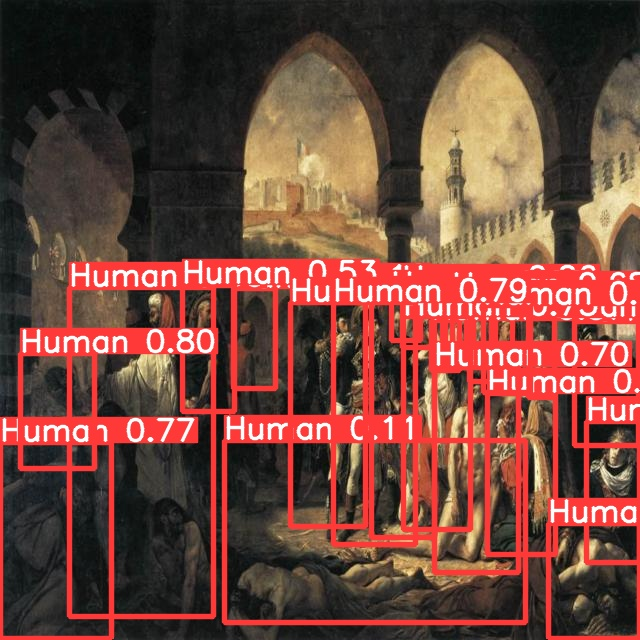

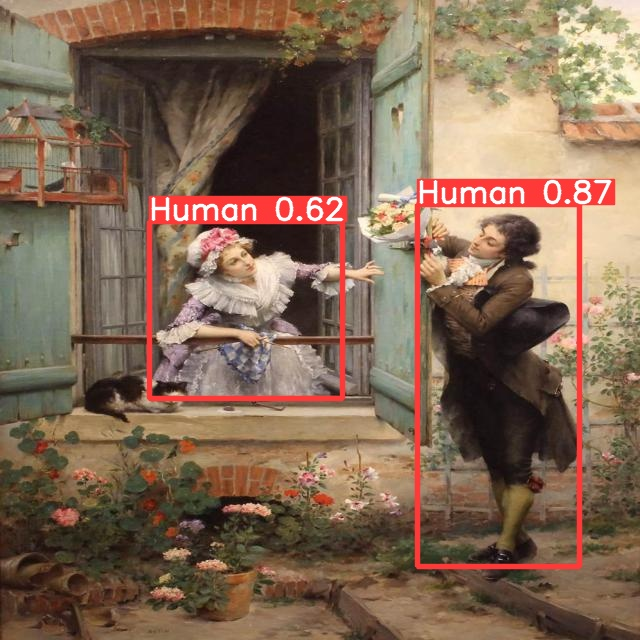

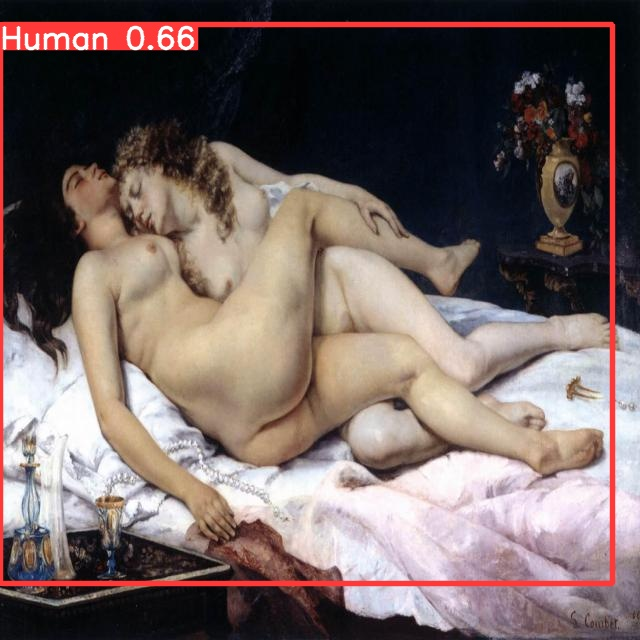

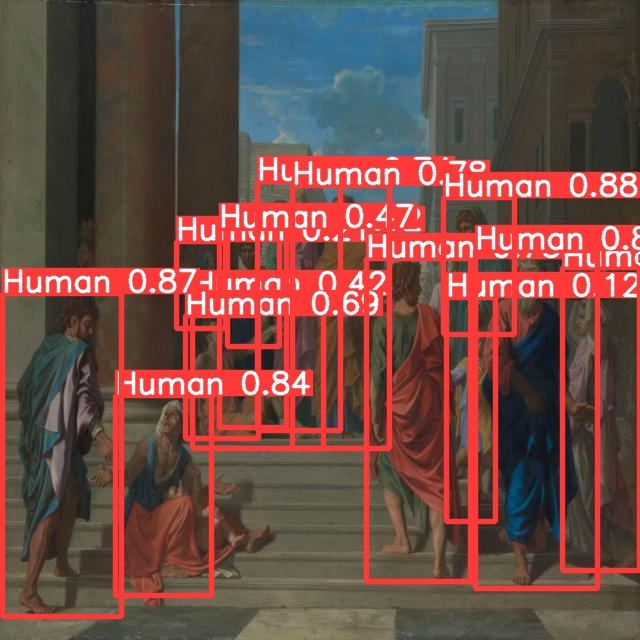

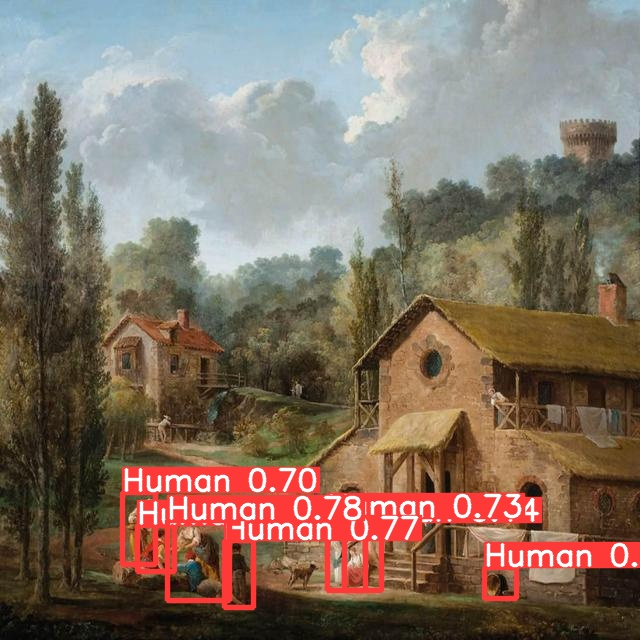

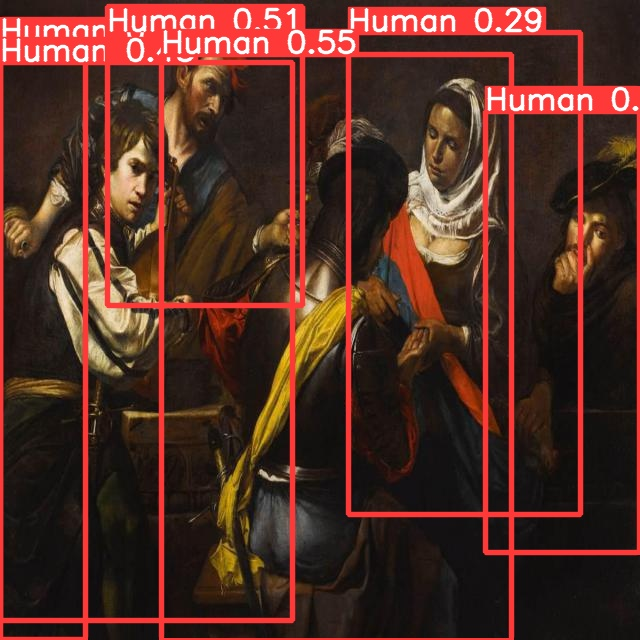

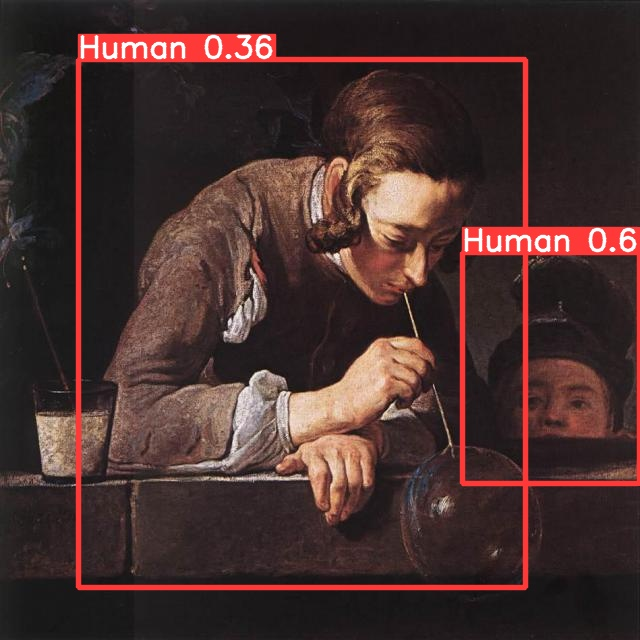

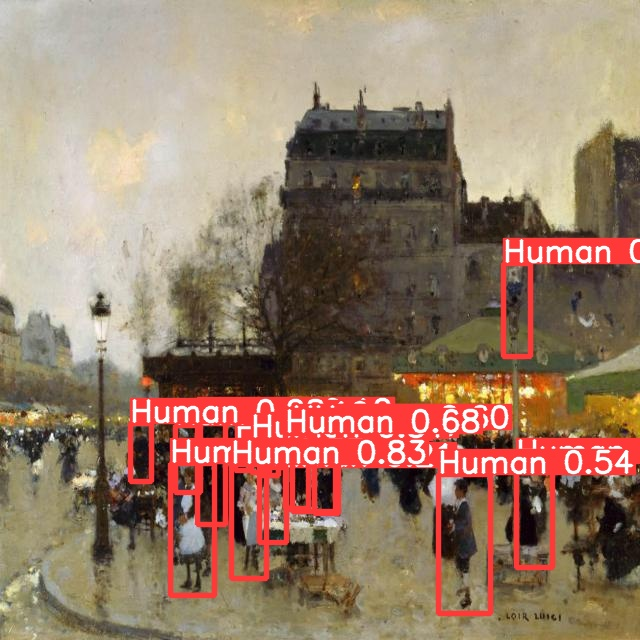

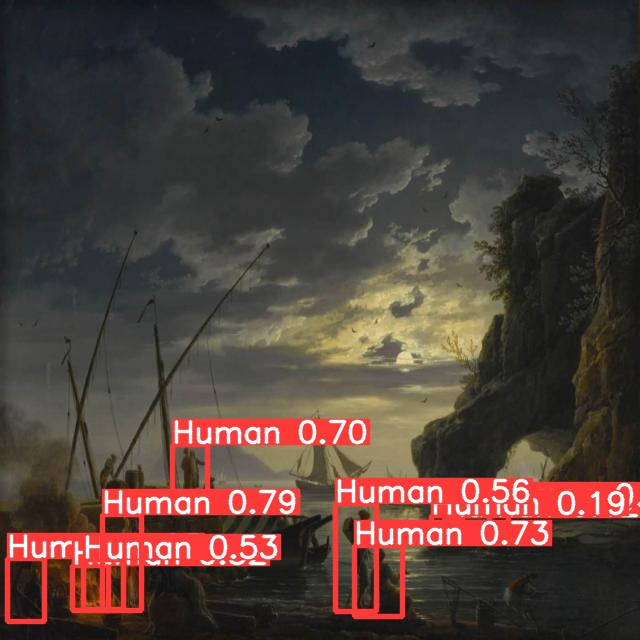

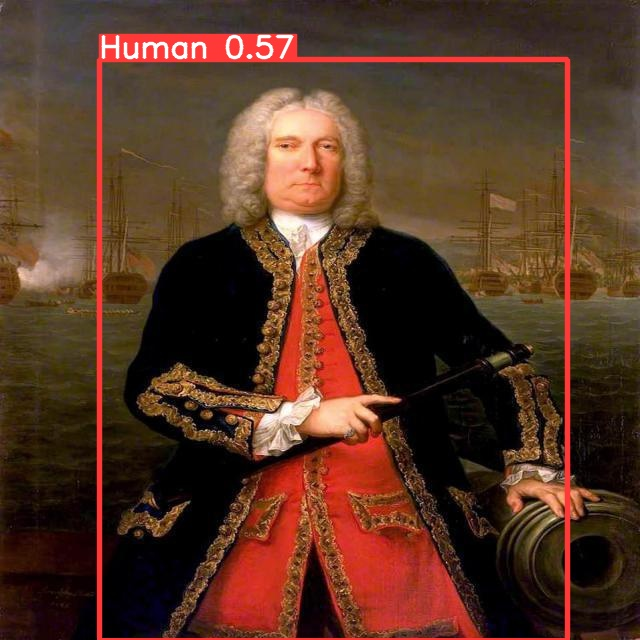

In [14]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")